<a href="https://colab.research.google.com/github/AaronRM9416/Core-Classwork/blob/main/ensemble_tree_core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ensemble Trees Exercise**
Aaron Musselwhite

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, \
OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import set_config
import matplotlib.pyplot as plt
set_config(display='diagram')

In [ ]:
data= 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT-rSDIBs1OyB-hyONIDtb4WdszbHNcyT2sUIf8CmLS98dWRKq5Bfyyc7Pt-XqsZS1QYgCUfs0i2u8p/pub?output=csv'

In [ ]:
df= pd.read_csv(data)

In [ ]:
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [ ]:
y = df['PRICE']
X = df.drop(columns = 'PRICE')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

1) Try a Decision Tree, Bagged Tree, and Random Forest.

*Decision Tree*

In [ ]:
d_tree= DecisionTreeRegressor(random_state = 42)

In [ ]:
d_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
d_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
predtrain= d_tree.predict(X_train)
predtest= d_tree.predict(X_test)

In [ ]:
train_score= d_tree.score(X_train, y_train)
print(train_score)

1.0


In [ ]:
test_score= d_tree.score(X_test, y_test)
print(test_score)

0.6193230918136841


In [ ]:
d_tree.get_depth()

20

In [ ]:
d_tree.get_n_leaves()

360

In [ ]:
depths = list(range(1, 20)) 
scoring = pd.DataFrame(index=depths, columns=['Test Score', 'Train Score']) 
for depth in depths:
  d_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
  d_tree.fit(X_train, y_train)
  train_score = d_tree.score(X_train, y_train)
  test_sccore = d_tree.score(X_test, y_test)
  scoring.loc[depth, 'Train Score'] = train_score
  scoring.loc[depth, 'Test Score'] = test_score 

In [ ]:
sort_sco = scoring.sort_values(by='Test Score', ascending=True)
sort_sco.head()

,Test Score,Train Score
1,0.619323,0.475164
17,0.619323,0.999968
16,0.619323,0.999811
15,0.619323,0.999476
14,0.619323,0.998707


In [ ]:
trainR2 = r2_score(y_train, predtrain)
testR2 = r2_score(y_test, predtest)

In [ ]:
print(f'Model Training R2: {trainR2}')
print(f'Model Testiing R2: {testR2}')

Model Training R2: 1.0
Model Testiing R2: 0.6193230918136841


In [ ]:
dec2 = DecisionTreeRegressor(max_depth= 10, random_state=42)
dec2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [ ]:
dec2_train_score = dec2.score(X_train, y_train)
dec2_test_score = dec2.score(X_test, y_test)
print(dec2_train_score)
print(dec2_test_score)

0.9867962386381032
0.8460104271509634


In [ ]:
MAEtrain = mean_absolute_error(y_train, predtrain)
MAEtest = mean_absolute_error(y_test, predtest)

print(f'Model Training MAE Score:{MAEtrain}')
print(f'Model Testing MAE Score:{MAEtest}')

Model Training MAE Score:0.0
Model Testing MAE Score:3.1409448818897636


In [ ]:
MSEtrain = mean_squared_error(y_train, predtrain)
MSEtest = mean_squared_error(y_test, predtest)

print(f'Model Training MSE Score:{MSEtrain}')
print(f'Model Testing MSE Score:{MSEtest}')

Model Training MSE Score:0.0
Model Testing MSE Score:26.657716535433075


In [ ]:
RMSEtrain = np.sqrt(MSEtrain)
RMSEtest = np.sqrt(MSEtest)

print(f'Model Training RMSE Score:{RMSEtrain}')
print(f'Model Testing RMSE Scoree:{RMSEtest}')

Model Training RMSE Score:0.0
Model Testing RMSE Scoree:5.163111129487053


 *Bagged Tree*

In [ ]:
frodobaggins= BaggingRegressor (random_state= 42)
frodobaggins.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
frodobaggins.fit(X_train, y_train)

BaggingRegressor(random_state=42)

In [ ]:
frodobaggins.predict(X_test)

array([24.04, 30.77, 18.39, 24.04, 16.09, 20.4 , 19.13, 15.03, 21.07,
       21.39, 18.87, 19.46,  7.68, 19.44, 18.93, 25.27, 19.06,  7.87,
       44.92, 14.98, 24.01, 23.58, 14.26, 24.63, 14.15, 12.82, 20.67,
       14.2 , 19.37, 20.33, 20.6 , 23.18, 31.23, 21.4 , 13.94, 15.81,
       36.2 , 19.6 , 20.22, 24.6 , 18.88, 25.75, 44.15, 20.44, 22.72,
       14.5 , 14.95, 24.43, 16.76, 28.32, 22.93, 34.44, 15.92, 25.6 ,
       47.42, 22.56, 15.93, 31.44, 21.34, 20.25, 27.03, 33.4 , 27.06,
       19.23, 28.11, 16.18, 14.58, 22.82, 28.31, 16.5 , 19.59, 25.86,
        9.79, 21.71, 21.47,  6.94, 20.52, 46.12, 11.9 , 14.74, 20.45,
       11.14, 20.37,  9.44, 20.4 , 26.58, 16.95, 23.41, 24.52, 17.98,
       23.  ,  7.34, 18.97, 20.09, 26.26, 20.12, 35.89, 11.42, 12.12,
       12.27, 20.1 , 23.  , 11.72, 23.22, 20.29, 15.51, 18.07, 25.05,
       21.62, 23.58,  7.73, 14.05, 21.61, 22.51, 33.87, 12.38, 43.51,
       16.17, 18.67, 24.28, 20.11, 24.72,  8.68, 20.84, 24.5 , 21.74,
       24.2 ])

In [ ]:
bagginses_train_score = frodobaggins.score(X_train, y_train)
bagginses_test_score = frodobaggins.score(X_test, y_test)
print(f'Model Training Score: {bagginses_train_score}')
print(f'Model Test Score: {bagginses_test_score}')

Model Training Score: 0.9606756023782893
Model Test Score: 0.8204208271364619


In [ ]:
estimators = [20, 40, 60, 80, 100]
score = pd.DataFrame(index=estimators, columns=['Train Score', 'Test Sccore'])
for num_estimators in estimators: 
  tea_bag = BaggingRegressor(n_estimators=num_estimators, random_state=42)
  tea_bag.fit(X_train, y_train)
  train_score = tea_bag.score(X_train, y_train)
  test_score = tea_bag.score(X_test, y_test)
  score.loc[num_estimators, 'Train Score '] = train_score
  score.loc[num_estimators, 'Test Score'] = test_score

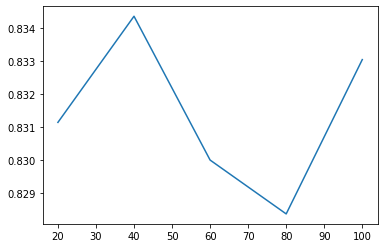

In [ ]:
plt.plot(score['Test Score'])
plt.show()

In [ ]:
scoring = score.sort_values(by='Test Score', ascending=False)
scoring

,Train Score,Test Sccore,Train Score,Test Score
40,NaN,NaN,0.973950,0.834365
100,NaN,NaN,0.977246,0.833051
20,NaN,NaN,0.970100,0.831147
60,NaN,NaN,0.976396,0.830005
80,NaN,NaN,0.976051,0.828372


In [158]:
best_est = scoring.index[0]
teabagtuning = BaggingRegressor(n_estimators=best_est,)
teabagtuning.fit(X_train, y_train)
print(teabagtuning.score(X_train, y_train))
print(teabagtuning.score(X_test, y_test))

0.9755359754811042
0.8294600020248473


*Random Forest*

In [159]:
runforestrun = RandomForestRegressor(random_state = 42)
runforestrun.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [161]:
runforestrun.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [163]:
runforestrun.predict(X_test)

array([22.986, 31.391, 19.003, 23.141, 16.213, 20.666, 18.768, 15.219,
       21.251, 20.809, 20.253, 20.247,  8.237, 21.228, 19.717, 26.426,
       19.432,  8.497, 46.203, 15.325, 23.637, 23.557, 14.31 , 24.344,
       15.369, 13.575, 21.195, 13.96 , 18.668, 21.416, 19.64 , 23.35 ,
       28.457, 21.533, 14.143, 16.065, 34.532, 19.198, 20.46 , 23.926,
       18.542, 28.025, 45.118, 19.994, 22.885, 14.364, 15.116, 23.797,
       17.815, 28.089, 21.717, 34.018, 16.448, 25.876, 44.673, 21.957,
       16.028, 31.978, 21.921, 20.542, 26.234, 33.55 , 30.222, 19.88 ,
       27.288, 16.302, 14.934, 22.961, 27.268, 17.147, 20.538, 30.51 ,
       10.187, 21.264, 21.262,  7.225, 20.097, 46.97 , 12.082, 13.522,
       22.008, 12.609, 20.435,  8.976, 20.58 , 27.007, 16.026, 23.329,
       24.346, 17.787, 22.135,  7.881, 18.524, 20.042, 25.241, 19.298,
       32.793, 13.215, 12.961, 12.98 , 19.742, 24.277, 13.176, 20.387,
       21.179, 14.004, 19.233, 24.822, 20.402, 24.114,  9.165, 14.91 ,
      

In [164]:
runforestrun_train_score = runforestrun.score(X_train, y_train)
runforestrun_test_score = runforestrun.score(X_test, y_test)
print(f'Model Training score:{runforestrun_train_score}')
print(f'Model Testing Score:{runforestrun_test_score}')

Model Training score:0.9771342521069045
Model Testing Score:0.8338530730048258


In [165]:
estdep = [estimator.get_depth() for estimator in runforestrun.estimators_]
max(estdep)

23

Tune each model to optimize performance on the test set.

In [167]:
d_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 19,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [168]:
d_tree.get_depth()

19

In [170]:
d_tree.get_n_leaves()

356

In [172]:
runforestreg = RandomForestRegressor(max_depth = 9, random_state = 42)
runforestreg.fit(X_train, y_train)
runforestreg_train_score = runforestreg.score(X_train, y_train)
runforestreg_test_score = runforestreg.score(X_test, y_test)
print(runforestreg_train_score)
print(runforestreg_test_score)

0.9708593696865943
0.8288183588216603


In [173]:
depthest = [estimator.get_depth() for estimator in runforestreg.estimators_]
max(depthest)

9

 Explain in a text cell how your model will perform if deployed by referring to the metrics.

*based on my metrics i felt that the model will perform accurately*